In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go

import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = sklearn.datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
x = diabetes.data
y = diabetes.target

In [5]:
import numpy as np

In [6]:
print(x.shape)
print(y.shape)

(442, 10)
(442,)


    Make several scatter plots to look at the relationship between y and the features in x

In [7]:
print(x)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

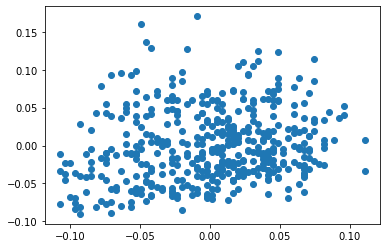

In [8]:
plt.scatter(x[:,0],
            x[:,2]
           )
plt.show()
#age vs. bmi

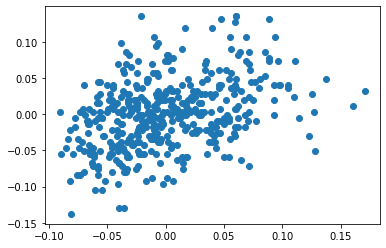

In [9]:
plt.scatter(x[:,2],
            x[:,-1]
           )
plt.show()
#bmi vs. blood sugar level

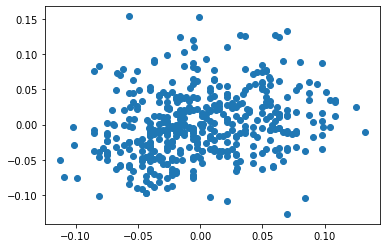

In [10]:
plt.scatter(x[:,3],
            x[:,4]
           )
plt.show()
#bmi vs. blood sugar level

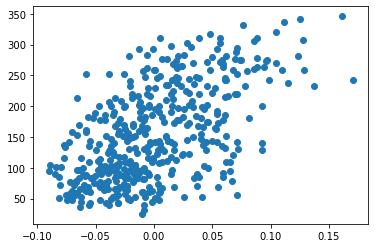

In [11]:
plt.scatter(x[:,2],
            y
           )
plt.show()
#bmi vs target

In [26]:
print(type(x[:,0]))
print(type(y))
print(x[:,0].shape)
print(y.shape)
print(x[:,0].dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442,)
(442,)
float64
float64


In [13]:
#Write a loop that prints the 10 correlation coefficients between y and the 10 features in x

for i in range(10):
    
    print(np.corrcoef(x[:,i],y))

[[1.         0.18788875]
 [0.18788875 1.        ]]
[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148385]
 [0.44148385 1.        ]]
[[1.         0.21202248]
 [0.21202248 1.        ]]
[[1.         0.17405359]
 [0.17405359 1.        ]]
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
[[1.         0.43045288]
 [0.43045288 1.        ]]
[[1.         0.56588343]
 [0.56588343 1.        ]]
[[1.         0.38248348]
 [0.38248348 1.        ]]


In [14]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=45)


In [15]:
x_train_transformed = x_train[:,2].reshape(-1,1)
x_test_transformed = x_test[:,2].reshape(-1,1)

In [16]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train_transformed,y_train)


LinearRegression()

In [17]:
print(model.intercept_)
print(model.coef_)

150.8456675199122
[935.92888946]


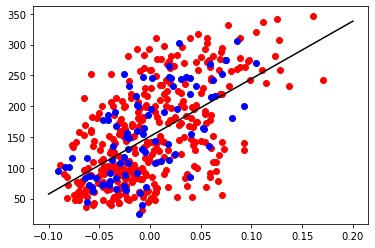

In [18]:
x_eq= np.linspace(-0.1,.20,10)

plt.scatter(x_train[:,2],y_train,color='red')
plt.scatter(x_test[:,2],y_test,color='blue')
eq= model.intercept_ + model.coef_*x_eq

plt.plot(x_eq,eq, 'k')

plt.show()



In [19]:
y_pred = model.predict(x_test_transformed)
print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))

MSE = 2984.89
R^2 = 0.40


In [20]:
model10 = sklearn.linear_model.LinearRegression()
model10.fit(x_train,y_train)


LinearRegression()

In [21]:
print(model10.intercept_)
print(model10.coef_)

152.13619339070766
[  23.45388514 -247.43107084  492.10188174  329.36498638 -970.79784704
  573.54460121  182.41386124  255.9162021   794.21654496   89.32074078]


In [22]:
y_pred = model10.predict(x_test)
print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))

MSE = 2374.33
R^2 = 0.52


The MSE and R-squared values are less than the original MSE and R squared using the test data. 